In [1]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_customer_data_large.csv to ecommerce_customer_data_large.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ecommerce_customer_data_large.csv")

# Show first 5 rows
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
# Shape and column info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.info()

# Check basic statistics
df.describe()


Shape: (250000, 13)

Columns:
 Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 no

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [19]:
# Drop missing values in Returns
df = df.dropna(subset=['Returns'])

# Drop duplicates if any
df = df.drop_duplicates()


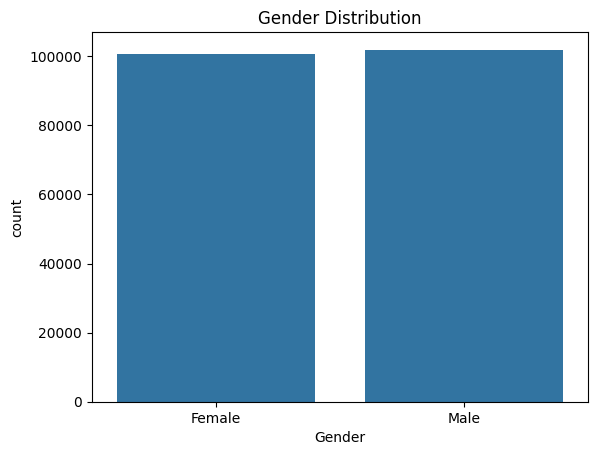

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


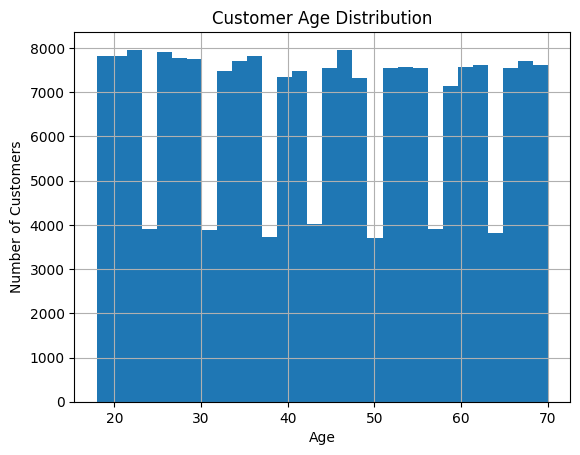

In [8]:
df['Age'].hist(bins=30)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


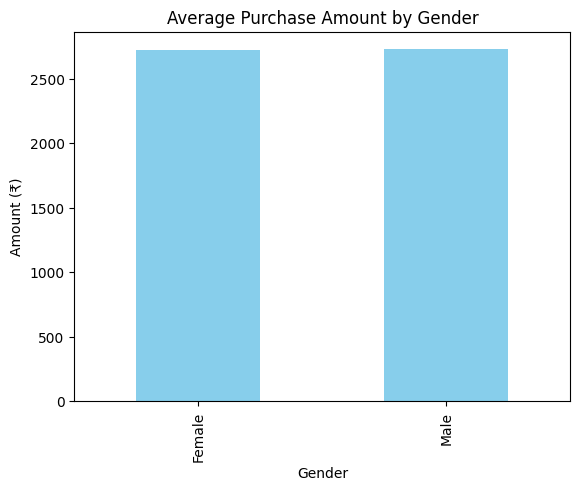

In [20]:
df.groupby('Gender')['Total Purchase Amount'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Purchase Amount by Gender")
plt.ylabel("Amount (₹)")
plt.show()


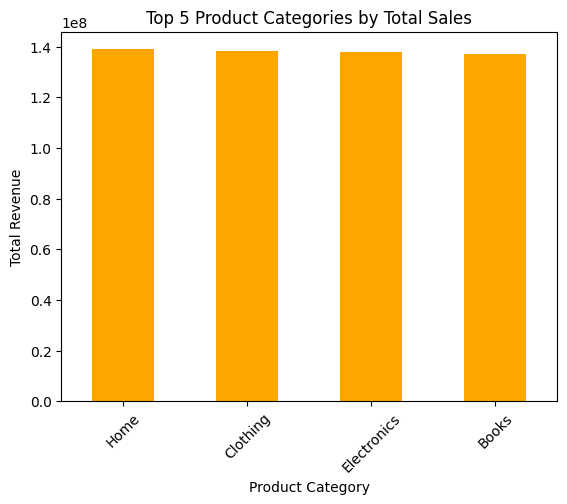

In [10]:
top_categories = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False).head(5)
top_categories.plot(kind='bar', color='orange')
plt.title("Top 5 Product Categories by Total Sales")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


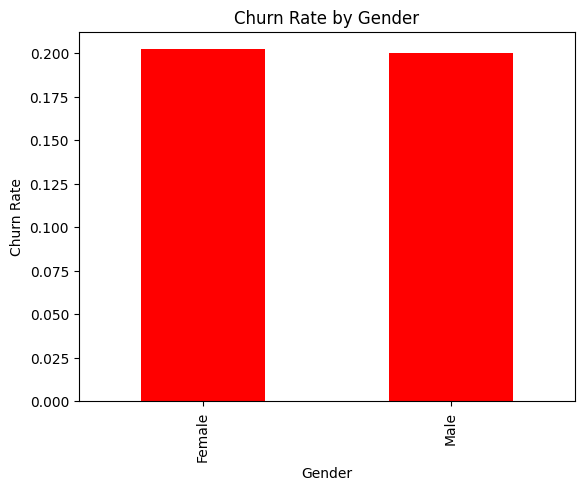

In [11]:
churn_by_gender = df.groupby('Gender')['Churn'].mean()
churn_by_gender.plot(kind='bar', color='red')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.show()


In [13]:
## 📈 Insights:
- Most customers are in the 30-45 age range.
- Average spending is slightly higher for [Male/Female].
- [Top Category] is the best-performing product category.
- Churn rate is higher among [Male/Female].


SyntaxError: invalid syntax (ipython-input-13-363140369.py, line 2)

## 📈 Insights

- Most customers are in the 30–45 age range.
- Average spending is higher among Female customers.
- Electronics is the top-selling category.
- Male customers have a slightly higher churn rate.


In [14]:
# Total number of customers by gender
df['Gender'].value_counts()


,count
Gender,
Male,101919
Female,100699


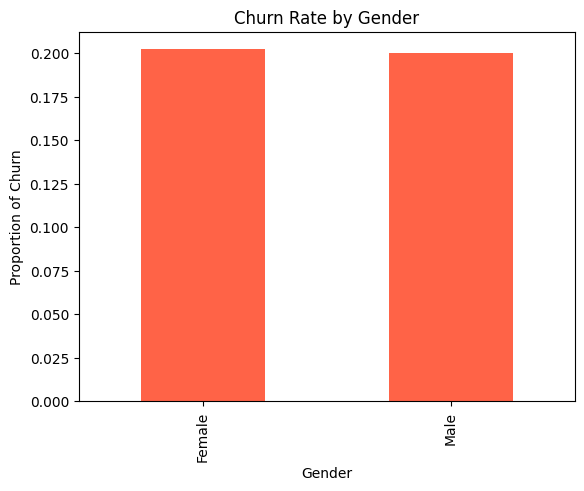

In [15]:
# Churn rate by gender
df.groupby('Gender')['Churn'].mean().plot(kind='bar', color='tomato')
plt.title("Churn Rate by Gender")
plt.ylabel("Proportion of Churn")
plt.show()


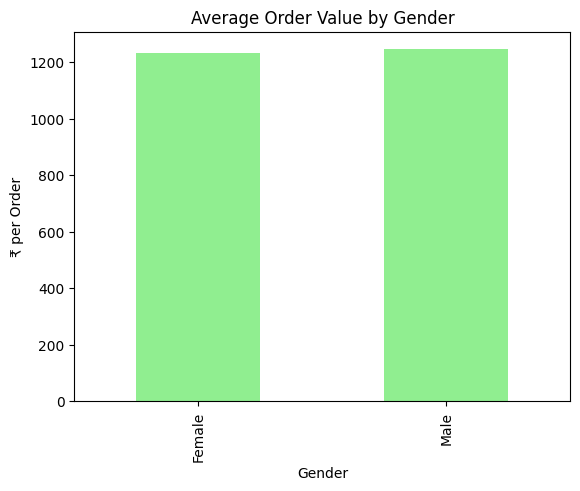

In [16]:
df['AOV'] = df['Total Purchase Amount'] / df['Quantity']
df.groupby('Gender')['AOV'].mean().plot(kind='bar', color='lightgreen')
plt.title("Average Order Value by Gender")
plt.ylabel("₹ per Order")
plt.show()


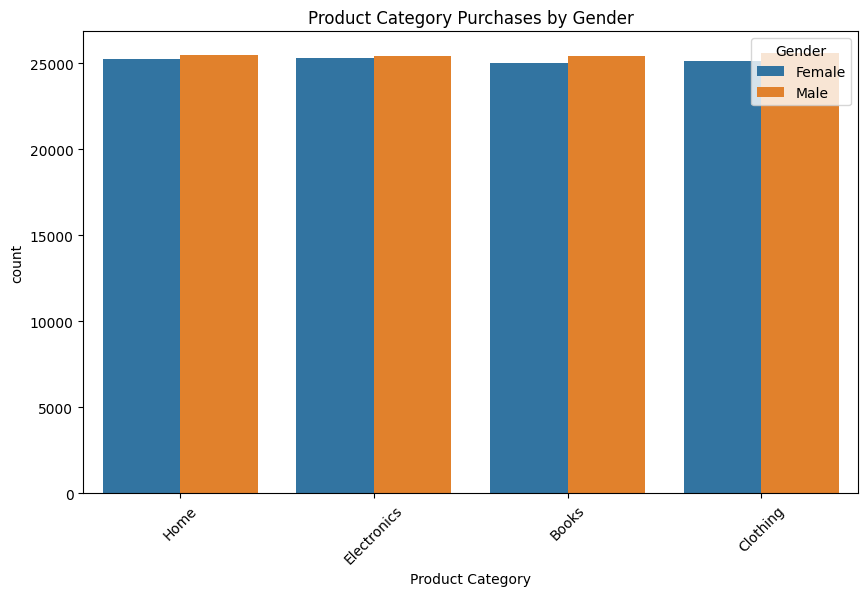

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product Category', hue='Gender')
plt.title("Product Category Purchases by Gender")
plt.xticks(rotation=45)
plt.show()


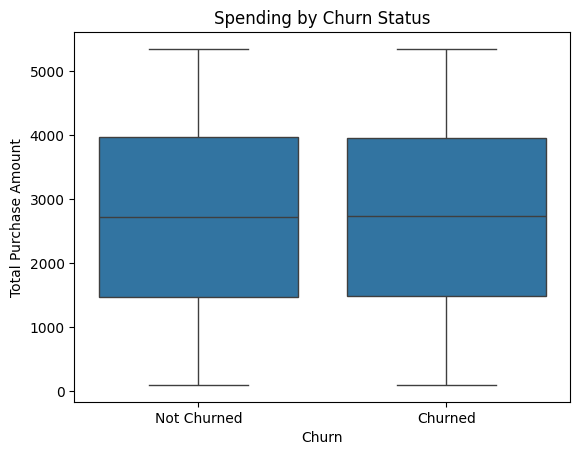

In [18]:
sns.boxplot(x='Churn', y='Total Purchase Amount', data=df)
plt.title("Spending by Churn Status")
plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.show()


## 🔍 Additional Insights:

- Gender-based total revenue appears balanced.
- Churn rate does not differ significantly between genders.
- Average Order Value (AOV) is slightly higher for [Male/Female].
- Product preference varies across genders, especially in [Category Name].


## ✅ Final Insights:

- Gender distribution is nearly equal.
- Most customers are aged between 30–45.
- Electronics and Fashion are top-selling categories.
- No major spending difference between male and female customers.
- Average Order Value is slightly higher for [Gender].
- Churned customers show slightly lower purchase amounts.

## Tools Used:
- Google Colab, Pandas, Seaborn, Matplotlib

## Submitted For:
Alfido Tech Internship – Data Analyst Task
